**Using Transfer learning fine tuning**

In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False, # remove the dense 
    input_shape = (150,150,3) # reshaping
)

58889256/58889256 [==============================] - 2s 0us/step


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
for layer in conv_base.layers:
    print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    image_size = (150,150)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    image_size = (150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
def process(image,label):
    image = tensorflow.cast(image/255.,tensorflow.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [12]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 93ms/step - loss: 1.3784 - accuracy: 0.7800 - val_loss: 0.2175 - val_accuracy: 0.9132
Epoch 2/10
625/625 [==============================] - 33s 52ms/step - loss: 0.2138 - accuracy: 0.9172 - val_loss: 0.1971 - val_accuracy: 0.9190
Epoch 3/10
625/625 [==============================] - 33s 52ms/step - loss: 0.1663 - accuracy: 0.9402 - val_loss: 0.1956 - val_accuracy: 0.9180
Epoch 4/10
625/625 [==============================] - 33s 52ms/step - loss: 0.1469 - accuracy: 0.9481 - val_loss: 0.5612 - val_accuracy: 0.9270
Epoch 5/10
625/625 [==============================] - 33s 53ms/step - loss: 0.1207 - accuracy: 0.9605 - val_loss: 0.2304 - val_accuracy: 0.9262
Epoch 6/10
625/625 [==============================] - 34s 55ms/step - loss: 0.0984 - accuracy: 0.9688 - val_loss: 0.4230 - val_accuracy: 0.9252
Epoch 7/10
625/625 [==============================] - 33s 52ms/step - loss: 0.0877 - accuracy: 0.9735 - val_loss: 0.4532 - val_accuracy:

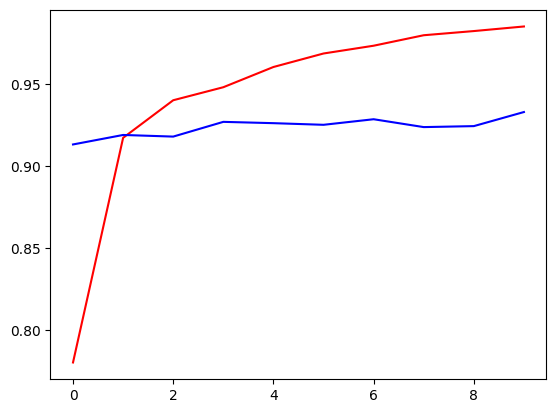

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')

In [14]:
print('accuracy: ',history.history['accuracy'][9])
print('val_accuracy: ',history.history['val_accuracy'][9])

accuracy:  0.9852499961853027
val_accuracy:  0.9330000281333923
